### Problem Statement: 
Clustering digits based on the 64 features (each digit image is 8x8 = 64 features)

In this external lab, we will venture into image based datasets. The aspect of this lab to introduce image data sets and give a view on how simple concept like clustering can actually do a good job on image data sets

#### 10 clusters:
0-9 digits

### Get Data 
#### from Sklearn datasets import load_digits dataset

In [1]:
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

#### Using load_digits function, get the data

In [2]:
#Load the digits dataset
digits = datasets.load_digits()

#### Print labels using load_digits().target

In [3]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

### Know the no.of records and features and do the required pre-processing

In [4]:
###Loading data for 10 classes
from sklearn.datasets import load_digits
X,y=load_digits(10,True)
print(X.shape,y.shape)

X=np.array(X)

(1797, 64) (1797,)


### Apply KMeans on the data

You can apply k = 10 as we know from the image data there are 10 classes of numbers 0 to 9

In [5]:
##Init
#The random state is used to initialise the kmeans at a given state for reproductability. 
#The initial centers and the final ones will change as the random seed does.
kmeans = KMeans(n_clusters=10, random_state=123)
##Fit
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

### Using Matplotlib plot the cluster centers as images

#### Using matplot to visually show how the cluster centres look. You can visually see the image of the numbers in the cluster centre image

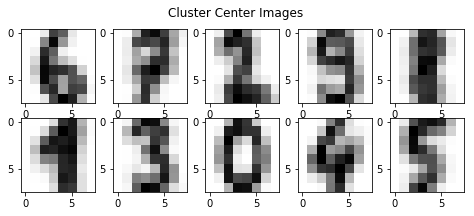

In [6]:
import matplotlib.pyplot as plt

# Figure size in inches
fig = plt.figure(figsize=(8, 3))
# Add title
fig.suptitle('Cluster Center Images')
# For all labels (0-9)
for i in range(10):
    # Initialize subplots in a grid of 2X5, at i+1th position
    ax = fig.add_subplot(2, 5, 1 + i)
    # Display images
    plt.imshow(kmeans.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
# Show the plot
plt.show()

In [7]:
kmeans.cluster_centers_.shape

(10, 64)

### Get the counts of each cluster

In [8]:
#Using unique function to get the counts of each cluster
clusters = kmeans.labels_
print(clusters,clusters.size)

unique, counts = np.unique(clusters, return_counts=True)
print(np.asarray((unique, counts)).T)

[7 4 4 ... 4 3 3] 1797
[[  0 182]
 [  1 202]
 [  2 176]
 [  3 248]
 [  4 228]
 [  5  91]
 [  6 180]
 [  7 179]
 [  8 166]
 [  9 145]]


# Visualizing the cluster centres in 2D space

For visualizing cluster centres, we will use PCA reduce the dimensions to 2 and then use scatter matrix to plot the centres

Hint: Use PCA(n_components=2).fit_transform(data) function 

In [9]:
import pandas as pd

#cc_df = pd.DataFrame(X)
cc_df = pd.DataFrame(X)

In [10]:
from sklearn.preprocessing import StandardScaler

#scale the data before PCA
#Using StandardScaler to standardize the dataset’s features onto unit scale (mean = 0 and variance = 1)
x = StandardScaler().fit_transform(cc_df)

In [11]:
# Reduce 64 dimensions to 2 dimensions for visual purpose
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
principalDf

,pc1,pc2
0,1.914220,-0.954472
1,0.588981,0.924679
2,1.302037,-0.317156
3,-3.020761,-0.868738
4,4.528932,-1.093670
5,-1.301882,-1.148101
6,1.434241,-2.957708
7,0.614223,5.462163
8,-1.098418,-0.665596
9,-0.537983,-0.777520


### Plot the cluster centers and reduced data points with separate markers using scatter function

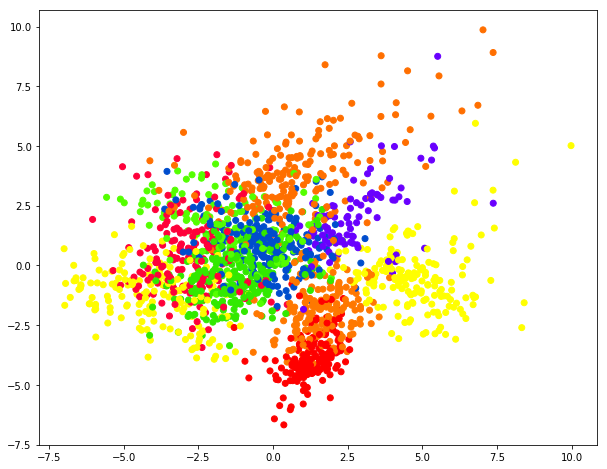

In [12]:

plt.figure(figsize=(10, 8))
plt.scatter(principalDf['pc1'], principalDf['pc2'], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

## Hierarchical Clustering

### Generate linkage matrix (Use Ward linkage and distance = Eucledian)

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage

#Using the reduced data points principalDF with two columns
# generate the linkage matrix
#Z = linkage(X, 'ward', metric='euclidean')
Z = linkage(principalDf, 'ward', metric='euclidean')
Z

array([[3.62000000e+02, 7.28000000e+02, 1.58057581e-03, 2.00000000e+00],
       [8.77000000e+02, 1.36500000e+03, 2.42614147e-03, 2.00000000e+00],
       [3.21000000e+02, 3.44000000e+02, 7.48196816e-03, 2.00000000e+00],
       ...,
       [3.58200000e+03, 3.58800000e+03, 6.81977134e+01, 1.07400000e+03],
       [3.58500000e+03, 3.59000000e+03, 9.58882232e+01, 1.28400000e+03],
       [3.58900000e+03, 3.59100000e+03, 1.29081674e+02, 1.79700000e+03]])

### Plot the dendogram

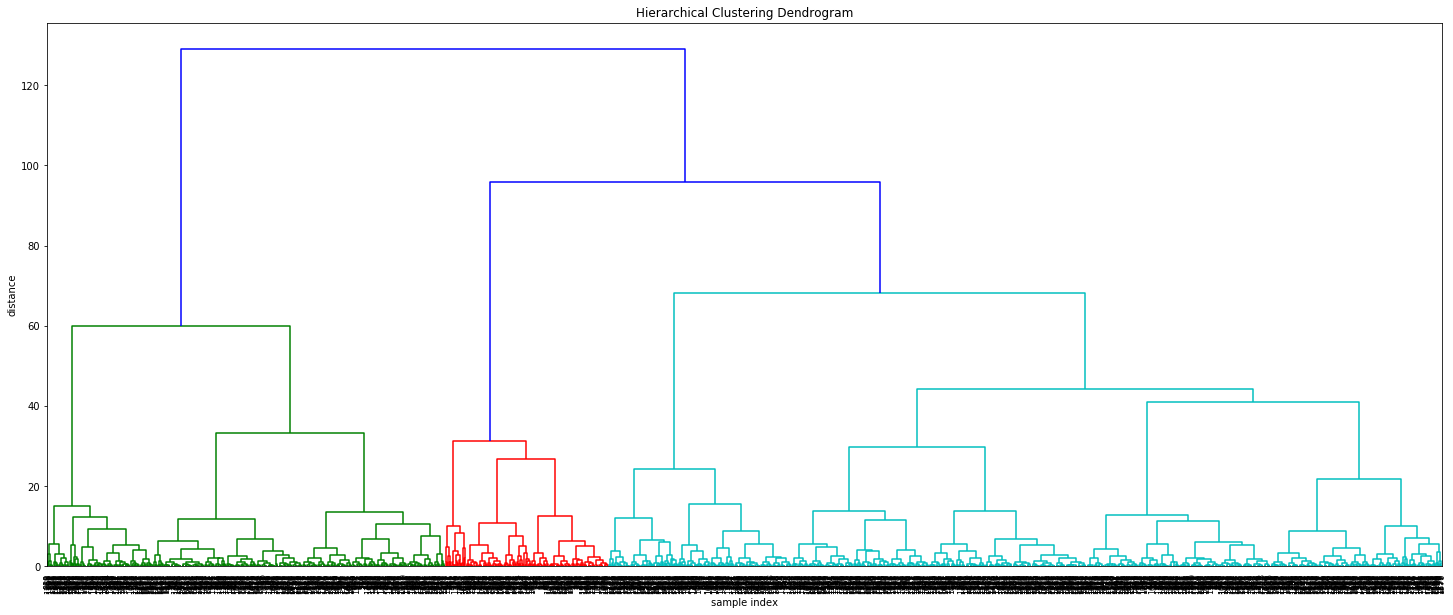

In [14]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

### show the last 10 merged clusters using dendogram

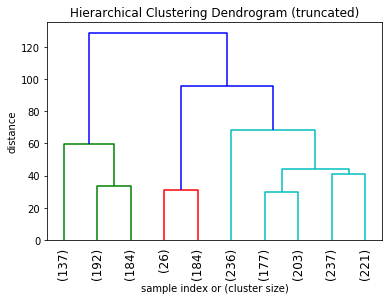

In [15]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10,  # show only the last 10 merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
)
plt.show()

### considering max distance as 70 (observe the above dendogram) generate the clusters using fcluster function in scipy

In [16]:
from scipy.cluster.hierarchy import fcluster
#max_d = 70
# As we know that the number of clusters are 10 (digits 0 to 10), if we choose the max distance of 27, we get 10 clusters
max_d = 27  
clusters = fcluster(Z, max_d, criterion='distance')

In [17]:
print(clusters,clusters.size)

unique, counts = np.unique(clusters, return_counts=True)
print(np.asarray((unique, counts)).T)

[3 8 8 ... 8 8 9] 1797
[[  1 137]
 [  2 192]
 [  3 184]
 [  4  26]
 [  5 184]
 [  6 236]
 [  7 177]
 [  8 203]
 [  9 237]
 [ 10 221]]


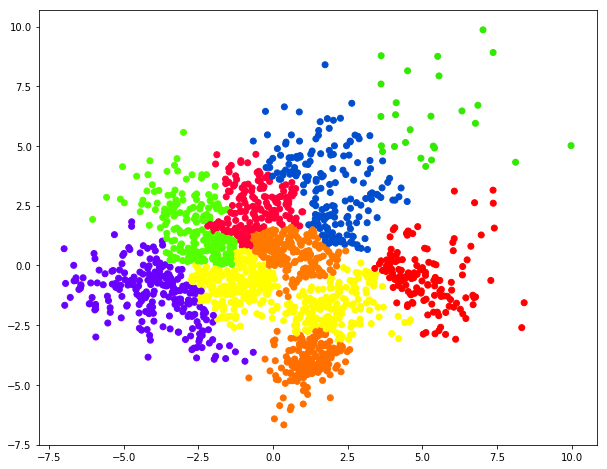

In [18]:
plt.figure(figsize=(10, 8))
plt.scatter(principalDf['pc1'], principalDf['pc2'], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()